In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# Create DataFrame
df=  pd.read_excel('D:/Desktop/5201/data/Social Media Usage_pivoted.xlsx')

# Convert '<1' to a numeric value (like 0.5 for visualization purposes)
df['Percentage'] = df['Percentage'].replace('<1', 0.5).astype(float)



In [34]:
# Group the data
df_age = df[df['Dimension'] == 'Age']
df_gender = df[df['Dimension'] == 'Gender']
df_income = df[df['Dimension'] == 'Income']
df_pol = df[df['Dimension'] == 'Political Affiliation']
df_race = df[df['Dimension'] == 'Race & Ethnicity']

# Pivot the DataFrame for each category
df_age_pivot = df_age.pivot_table(index='Category', columns='Platform', values='Percentage')
df_gender_pivot = df_gender.pivot_table(index='Category', columns='Platform', values='Percentage')
df_income_pivot = df_income.pivot_table(index='Category', columns='Platform', values='Percentage')
df_pol_pivot = df_pol.pivot_table(index='Category', columns='Platform', values='Percentage')
df_race_pivot = df_race.pivot_table(index='Category', columns='Platform', values='Percentage')



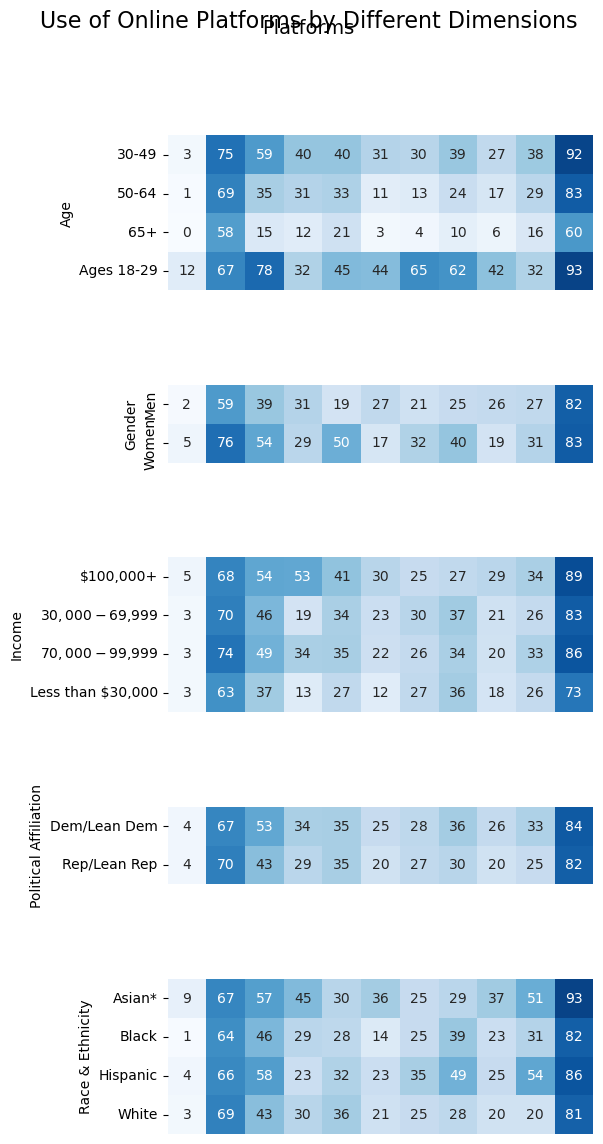

In [48]:
# Set up a global color scale by finding the min and max across all datasets
vmin = 0.5
vmax = 100

# Create subplots and arrange them in a column
n_rows = 5
n_cols = 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6, 12))



# List to store pivots for looping
pivots = [df_age_pivot, df_gender_pivot, df_income_pivot, df_pol_pivot, df_race_pivot]
titles = ['Age', 'Gender', 'Income', 'Political Affiliation', 'Race & Ethnicity'] 

# Plot each heatmap
for ax, pivot, title in zip(axes, pivots, titles):
    sns.heatmap(pivot, ax=ax, annot=True, fmt=".0f", cmap="Blues", vmin=vmin, vmax=vmax, cbar=False)
    ax.set_ylabel(title)
    ax.xaxis.set_visible(False)  # Hide x-axis labels
    ax.set_aspect('equal')  # Ensure each square is equally sized

# Set a common x-axis label
fig.text(0.5, 0.96, 'Platforms', ha='center', fontsize=14) # Common x-axis label at the top
fig.suptitle('Use of Online Platforms by Different Dimensions', fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the plot
plt.show()